## Course Information
INFO 521: Introduction to Machine Learning\
Instructor: Xuan Lu, College of Information Science

## Instructions
#### Objectives
This worksheet will assess your knowledge of basic commands in Python. Please review the lectures, suggested readings, and additional resources before starting the homework, as this document closely follows the provided materials.

#### Grading
Please note that grades are **NOT exclusively based on your final answers**. We will be grading the overall structure and logic of your code. Feel free to use as many lines as you need to answer each of the questions. I also highly recommend and strongly encourage adding comments (`#`) to your code. Comments will certainly improve the reproducibility and readability of your submission. Commenting your code is also good coding practice. **Specifically for the course, you’ll get better feedback if the TA is able to understand your code in detail.**

__Total score__: 100 points, with an additional 10 points available for extra credit.

#### Submission
This homework is due by the end of the week it is released (**Sunday, 11:59 pm AZ time**). Please contact the instructor if you are (i) having issues opening the assignment, (ii) not understanding the questions, or (iii) having issues submitting your assignment. Note that late submissions are subject to a penalty (see late work policies in the syllabus).
- Please submit a single Jupyter Notebook file (this file). Answers to each question should be included in the relevant block of code (see below). Rename your file to "**lastname_Hw3.ipynb**" before submitting. <font color='red'>A broken file won’t be graded, so please ensure that your file is accessible.</font> If a given block of code is causing issues and you didn't manage to fix it, please add comments.

#### Time commitment
Please reach out if you’re taking more than ~18h to complete (1) this homework, (2) reading the book chapters, and (3) going over the lectures. I will be happy to provide accommodations if necessary. **Do not wait until the last minute to start working on this homework**. In most cases, working under pressure will certainly increase the time needed to answer each of these questions and the instructor and the TA might not be 100% available on Sundays to troubleshoot with you.

#### Looking for help?
First, please go over the relevant readings for this week. Second, if you’re still struggling with any of the questions, do some independent research (e.g. stackoverflow is a wonderful resource). Don’t forget that your classmates will also be working on the same questions - reach out for help (check under the Discussion forum for folks looking to interact with other students in this class or start your own thread). Finally, the TA is available to answer any questions during office hours and via email.

## Questions
#### Author:
Name: Christian Ortmann\
Affiliation: Computing Sciences Researcher, SMMR; MSDS 25'

### Conceptual

#### Question 1

Describe the null hypotheses to which the _p_-values given in the table (see below). Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

|  | Coefficient | Std. error | t-statistics | p-value |
|---|:---:|:---:|:---:|:---:|
| Intercept | 2.939 | 0.3119 | 9.42 | <0.0001 |
| TV | 0.046 | 0.0014 | 32.81 | <0.0001 |
| Radio | 0.189 | 0.0086 | 21.89 | <0.0001 |
| Newspaper | -0.001 | 0.0059 | -0.18 | 0.8599 |

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 2

Assume that you collected a dataset of 100 observations containing a single predictor and a quantitative response. Then, you decided to fit a (i) linear regression model to the data, as well as a separate (ii) cubic regression, i.e. $Y = β_{0} + β_{1}X^{1} + β_{2}X^{2} + β_{3}X^{3} + ϵ$.

a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = β_{0} + β_{1}X + ϵ$. Consider the training residual sum of squares (_RSS_) for the linear regression, and also the training _RSS_ for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> **_Answer:_**  [BEGIN SOLUTION].

b) Answer part (a) using the test rather than training RSS.

> **_Answer:_**  [BEGIN SOLUTION].

c) Suppose that the true relationship between $X$ and $Y$ is not linear. However, we don’t know how far it is from linear. Consider the training _RSS_ for the linear regression, and also the training _RSS_ for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> **_Answer:_**  [BEGIN SOLUTION].

d) Answer (c) using test rather than training _RSS._

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 3

a) Discuss the implications that uncertainty in $X$ would have on parameter estimates based on linear regression models. Should we care about error in $X$ when fitting OLS regressions? 

> **_Answer:_**  [BEGIN SOLUTION].

b) Provide a brief discussion on the concept of regression dilution.

> **_Answer:_**  [BEGIN SOLUTION].

c) Are there any linear regression models that account for uncertainty in $X$ and $Y$? Please do some independent research and cite your sources.

> **_Answer:_**  [BEGIN SOLUTION].

d) Distinguish between least squares and maximum likelihood in the context of linear regression models.

> **_Answer:_**  [BEGIN SOLUTION].

### Applied
Feel free to use any function you find suitable if a specific function is not explicitly required.

#### Question 4

This question involves the use of simple linear regression on the `Auto` data set.

a) Use the `statsmodels.api` package to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Print the regression results. 

In [61]:
# BEGIN SOLUTION

import statsmodels.api as sm
import pandas as pd

#---------------------------------------------------------
#code chunk from HW2 to get rid of NA issues in horsepower
#---------------------------------------------------------
auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/hw2_data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this
print(auto.isna().any()) #check for missing/na values
auto = auto.replace("?", 'NA') #replace ? with NAs
auto = auto[~auto['horsepower'].str.contains('NA')] #drop rows with NAs, for some reason drop ? doesnt work
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto.head()
auto.dtypes
#---------------------------------------------------------

x = sm.add_constant(auto["horsepower"]) #add constant for simple linear regression
smModel = sm.OLS(auto["mpg"], x).fit()
print(smModel.summary()) #print whole summary
print(smModel.params) #show just the coefs

#https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/parallel-slopes-c88dacee-fa74-4c3e-91af-e125a79611a6?ex=12 for RSE
print((smModel.mse_resid)**(1/2)) #RSE is sqrt of MSE



# END SOLUTION

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        10:56:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_17096/3167133921.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/hw2_data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this


Then, answer the questions below:\
i. Is there a relationship between the predictor and the response?

> **_Answer:_**  [Yes, a very small negative relationship between horsepower and mpg. The coefficient of horsepower is -0.16, which suggests a small decrease in MPG as horsepower increases by one unit].

ii. How strong is the relationship between the predictor and the response? Focus on the _RSE_, estimated $R^2$, and _slope._

> **_Answer:_**  [RSE is 4.91, R^2 is 0.606, and slope is the coefficient of horsepower, which is -0.16. Based on RSE, we can see that there is about 5 units of irreducible error from the model fit and the actual value which means that data points are ~ 5 units away from the regression line, on average. The R^2 tells us about the amount of variance in the data points explained by the regression fit; in this case we have a value of 60.6% (out of 100%) which suggests that we have a moderately fair fit. Essentially the fit of the line can only explain 60.6% of our data for the best possible fit. The slope is a small negative value, suggesting that the influence of horsepower is minimal on MPG (for each unit changed)].

iii. Is the relationship between the predictor and the response positive or negative?

> **_Answer:_**  [Negative].

iv. What is the predicted mpg associated with a __horsepower__ of __98__? What are the associated 95% confidence and prediction intervals?

In [83]:
# BEGIN SOLUTION
test = sm.add_constant([98], has_constant="add") #use has constant = add to add a constant to 
pred = smModel.get_prediction(test) #get_prediction is similar to prediction  but gives further information 
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals of summary frame (mean of all values)
print(pred_summary)
# END SOLUTION

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


0    24.467077
Name: mean, dtype: float64

ANS: Predicted value is 24.467, which is equivalent to plugging 98 into the equation for the regression line of y = -0.15x+39.9. We use summary frame to return the confidence intervals of the predction (average for all predictions, but since we only have one value we have the actual value of the prediction). Our confidence intervals show the range that 95% of the predicted values will lie within an interval of 23.9 to 25.9. The prediction interval is 14.8-34.1 for our prediction and means that the prediction of 98, when predicted 100 times, 95 of them will result in an mpg of ~15 to 34.

v. Now, please briefly explain the main use of inverse predictions. List at least two practical examples.

> **_Answer:_**  [Main use of inverse prediction is to determine data that may not be directly observable or measurable. One use case may be a test where temperature limits a sensors use range, so we could predict a temperature where a specific condition occurs based on the linear relationship. Another use case may be fixing missing data points rather than dropping them or imputating based on means/modes by assuming a linear relationship about the rest of the data.].

vi. Finally, predict horsepower from the same mpg value predicted in (__iv__). Comment on your results.

In [84]:
# BEGIN SOLUTION
#assuming a relationship of x = (y-39.9)/-0.15

x = (pred_summary["mean"]-smModel.params[0])/(smModel.params[1])
print(x)

# END SOLUTION

0    98.0
Name: mean, dtype: float64


/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_17096/2229965241.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (pred_summary["mean"]-smModel.params[0])/(smModel.params[1])


ANS: Here we predict the x value exactly as we put it into the model earlier. This is because our relationship is inflexible and linear, so we can simply rearrage the equation to solve for x and plug in our predicted y.

b) Plot the response and the predictor. Display the least squares regression line as well.

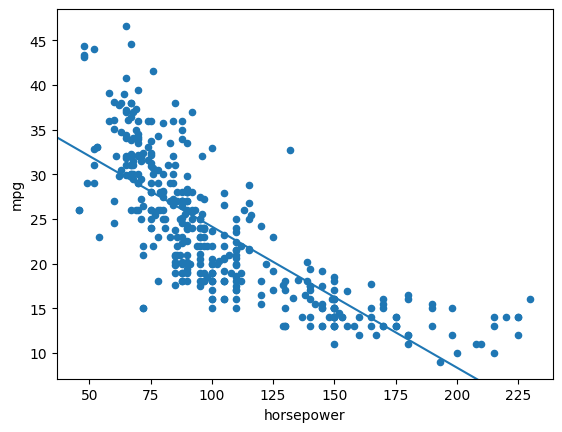

In [101]:
# BEGIN SOLUTION

import matplotlib.pyplot as plt
# scatter-plot data
ax1 = auto.plot(x='horsepower', y='mpg', kind='scatter')
# plot regression line
fig = sm.graphics.abline_plot(model_results=smModel, ax=ax1) #plot the regression line
plt.show()  #show results


# END SOLUTION

c) Produce diagnostic plots of the least squares regression fit using any suitable package or function. Comment on any issues you observe with the fit.

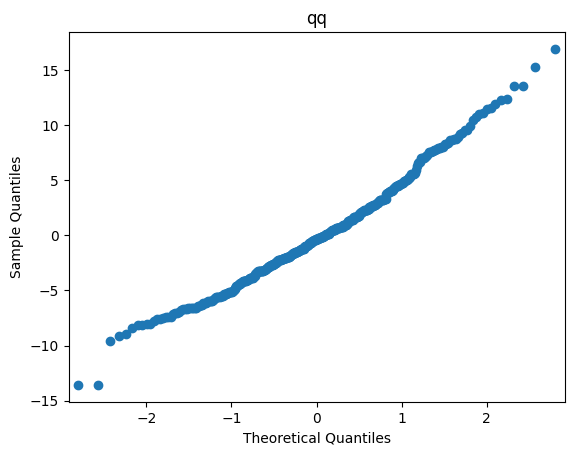

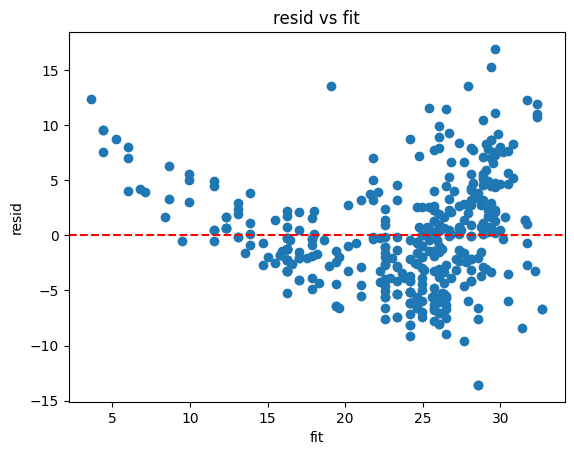

In [127]:
# BEGIN SOLUTION

#https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html


qq = sm.graphics.qqplot(smModel.resid)
plt.title('qq')

plt.figure()
fitted_values = smModel.fittedvalues  # Get the fitted values
residuals = smModel.resid  # Get the residuals

plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title('resid vs fit')
plt.xlabel('fit')
plt.ylabel('resid')
plt.show()
# END SOLUTION

ANS: The linearity of the QQ scatter plot suggests that the data is normally distributed. The distinct curve of the fitted vs residuals suggests that the linear regression may not capture non-linear relationships in the data.

#### Question 5

This question involves the use of multiple linear regression on the `Auto` data set. Read the dataset first:

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

b) Compute the matrix of correlations between the variables. You will need to exclude the name variable, which is qualitative. Also plot the corresponding correlation matrix.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

c) Use the `statsmodels.api` package to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Print the results. Use the questions below to comment on the output.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

i. Is there a significant association between the predictors and the response?

> **_Answer:_**  [BEGIN SOLUTION].

ii. Which predictors appear to have a statistically significant relationship to the response?

> **_Answer:_**  [BEGIN SOLUTION].

iii. What does the coefficient for the year variable suggest?

> **_Answer:_**  [BEGIN SOLUTION].

(d) Produce diagnostic plots of the linear regression fit. Again, feel free to use any package or function to create these plots. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

(e) Fit linear regression models with interaction effects. Please explore a few different models (~3–4 models). Do any interactions appear to be statistically significant in any of the models you examined? Feel free to use stepwise selection if interested. Your model exploration does not have to be extensive by any means.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

(f) Try a few different transformations of the variables, such as `log(X)`, `sqrt(X)`, $X^2$. Comment on your findings.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 6

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to set a random seed prior to starting part (a) to ensure consistent results.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

a) Create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, `X`.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

b) Create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution — a normal distribution with mean zero and variance `0.25`.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

c) Using `x` and `eps`, generate a vector `y` according to the model $Y = -1 + 0.5X + ϵ$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

e) Fit a least squares linear model that relates y and `x`. Comment on the model obtained. How do the estimated coefficients (slope and intercept) compare to the true values used to simulate the data?

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

f) Display the least squares line on the scatterplot obtained in (d). Draw the true line on the plot, in a different color. Create an appropriate legend. 

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model analyzed in this section should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model analyzed in this section ($Y = -1 + 0.5X + ϵ$) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $ϵ$ in (b). Describe your results.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

j) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 7
This question focuses on the collinearity problem.
 
(a) Perform the following commands first: 

In [ ]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(scale=0.1, size=100)
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

The last line corresponds to creating a linear model in which $y$ is a function of $x_1$ and $x_2$. Write out the form of the linear model. What are the regression coefficients?

> **_Answer:_**  [BEGIN SOLUTION].

(b) What is the correlation between $x_1$ and $x_2$? Create a scatterplot displaying the relationship between the variables.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

(c) Using this data, fit a least squares regression to predict $y$ using $x_1$ and $x_2$. Describe the results obtained. What are $β_0$, $β_1$, and $β_2$? How do these relate to the true $β_10$, $β_1$, and $β_2$? Can you reject the null hypothesis $H_0$: $β_1$ = 0? How about the null hypothesis $H_0$: $β_2$ = 0?

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

(d) Now fit a least squares regression to predict $y$ using only $x_1$. Comment on your results. Can you reject the null hypothesis $H_0$: $β_1$ = 0?

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

(e) Now fit a least squares regression to predict $y$ using only $x_2$. Comment on your results. Can you reject the null hypothesis $H_0$: $β_1$ = 0?

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

> **_Answer:_**  [BEGIN SOLUTION].

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured. Make up a new data point for this observation and re-fit the linear models from parts (c) to (e). What effect does this new observation have on each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 8

It is claimed that in the case of simple linear regression of $Y$ onto $X$, the $R^2$ statistic is equal to the square of the correlation between $X$ and $Y$. Generate some synthetic data and show that this is the case.

In [ ]:
# BEGIN SOLUTION

# END SOLUTION

### Extra credit

#### Question 1

Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form 
$$
\hat{y}_i = x_i \hat{\beta}
$$

Where, 
$$
\hat{\beta} = \left( \sum_{i=1}^n x_{i} y_{i} \right) / \left( \sum_{i'=1}^n x_{i'}^2 \right)
$$

Show that we can write
$$
\hat{y}_i = \sum_{i'=1}^n a'_i y'_i
$$

What is $a'_i$?

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 2

Given that,
$$\hat{\beta}_1 = \dfrac{\displaystyle\sum\limits_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) }{\displaystyle \sum\limits_{i=1}^{n}(x_i-\bar{x})^2}\text{,}$$
and $\hat{\beta}_0 = \bar{y}-\hat{\beta}_1\bar{x}$, argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}$, $\bar{y}$).

> **_Answer:_**  [BEGIN SOLUTION].